In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

In [2]:
import tensorflow as tf
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.drop(['Id'], inplace = True, axis = 1 )
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train_labels = train['Cover_Type']
np.sum(train_labels == 7)

2160

In [5]:
train.drop(['Cover_Type'], inplace = True, axis = 1 )
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.1, random_state=42, shuffle=True)

In [12]:
def train_inference_KNN(number_of_neigbor):
    print("training KNN model ...")
    print("the number of neig is: " +str(number_of_neigbor))
    model = KNeighborsClassifier(n_neighbors=number_of_neigbor)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
    return np.sum(test_predictions == y_test)/len(y_test), np.sum(train_predictions == y_train)/len(y_train), model

In [9]:
len(X_test)

1512

In [10]:
test_accuracy = []
train_accuracy = []
max_acc = 0
KNN_model = None
for num in range(3, 19, 2):
    test_acc, train_acc, model = train_inference_KNN(num)
    if KNN_model == None or max_acc < test_acc:
        max_acc = test_acc
        KNN_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the test accuracies are: ")
print(test_accuracy)
print("the training accraucy are : ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))

training KNN model ...
the number of neig is: 3
training KNN model ...
the number of neig is: 5
training KNN model ...
the number of neig is: 7
training KNN model ...
the number of neig is: 9
training KNN model ...
the number of neig is: 11
training KNN model ...
the number of neig is: 13
training KNN model ...
the number of neig is: 15
training KNN model ...
the number of neig is: 17
the test accuracies are: 
[0.830026455026455, 0.8247354497354498, 0.8035714285714286, 0.791005291005291, 0.7751322751322751, 0.7678571428571429, 0.7625661375661376, 0.7585978835978836]
the training accraucy are : 
[0.9193121693121693, 0.8805114638447972, 0.8561875367430923, 0.8350235155790712, 0.8224573780129336, 0.81114050558495, 0.8032774838330394, 0.7926219870664315]
the best accuracy is : 0.830026455026455


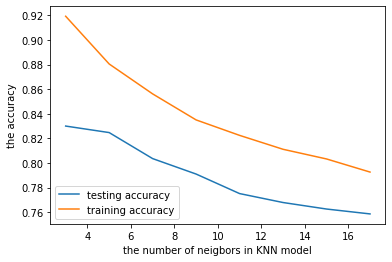

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(3, 19, 2), test_accuracy, label='testing accuracy')
plt.plot(range(3, 19, 2), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of neigbors in KNN model")
plt.legend(loc='lower left')
plt.show()

In [13]:
### train Desion tree model and create a function:
from sklearn.tree import DecisionTreeClassifier
def train_inference_DT(max_depth_):
    print("train the decision tree model with maxdepth is " +str(max_depth_))
    model = DecisionTreeClassifier(max_depth=max_depth_)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
    return np.sum(test_predictions == y_test)/len(y_test), np.sum(train_predictions == y_train)/len(y_train), model

In [13]:
test_accuracy = []
train_accuracy = []
DT_model = None
max_acc = 0
for num in range(5, 40, 3):
    test_acc, train_acc, model = train_inference_DT(num)
    if DT_model==None or max_acc < test_acc:
        max_acc = test_acc
        DT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuray are: ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))

train the decision tree model with maxdepth is 5
train the decision tree model with maxdepth is 8
train the decision tree model with maxdepth is 11
train the decision tree model with maxdepth is 14
train the decision tree model with maxdepth is 17
train the decision tree model with maxdepth is 20
train the decision tree model with maxdepth is 23
train the decision tree model with maxdepth is 26
train the decision tree model with maxdepth is 29
train the decision tree model with maxdepth is 32
train the decision tree model with maxdepth is 35
train the decision tree model with maxdepth is 38
the testing accuray are: 
[0.6441798941798942, 0.7202380952380952, 0.7804232804232805, 0.794973544973545, 0.7943121693121693, 0.7916666666666666, 0.7824074074074074, 0.7857142857142857, 0.7863756613756614, 0.8009259259259259, 0.7916666666666666, 0.7857142857142857]
the training accuray are: 
[0.6712962962962963, 0.7619782480893592, 0.8594209288653734, 0.9351851851851852, 0.9767048794826573, 0.993459

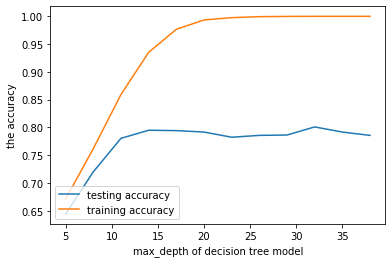

In [14]:
### draw decision tree result
import matplotlib.pyplot as plt
plt.plot(range(5, 40, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 40, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("max_depth of decision tree model")
plt.legend(loc='lower left')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
# random forest tree model
def train_inference_random_forest_tree(n_estimator_, max_depth_):
    print(" the number of tree is " + str(n_estimator_))
    print("train the random forest tree model with maxdepth is " +str(max_depth_))
    model = RandomForestClassifier(max_depth=max_depth_, n_estimators=n_estimator_)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
    return np.sum(test_predictions == y_test)/len(y_test), np.sum(train_predictions == y_train)/len(y_train), model

In [16]:
# train  random FT model and fix n_estimator == 10
# thorugh change depth of tree to investigate the accuracy changes

test_accuracy = []
train_accuracy = []
RFT_model = None
max_acc = 0
for num in range(5, 60, 3):
    test_acc, train_acc, model = train_inference_random_forest_tree(10, num)
    if RFT_model==None or max_acc < test_acc:
        max_acc = test_acc
        RFT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuray are: ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))

 the number of tree is 10
train the random forest tree model with maxdepth is 5
 the number of tree is 10
train the random forest tree model with maxdepth is 8
 the number of tree is 10
train the random forest tree model with maxdepth is 11
 the number of tree is 10
train the random forest tree model with maxdepth is 14
 the number of tree is 10
train the random forest tree model with maxdepth is 17
 the number of tree is 10
train the random forest tree model with maxdepth is 20
 the number of tree is 10
train the random forest tree model with maxdepth is 23
 the number of tree is 10
train the random forest tree model with maxdepth is 26
 the number of tree is 10
train the random forest tree model with maxdepth is 29
 the number of tree is 10
train the random forest tree model with maxdepth is 32
 the number of tree is 10
train the random forest tree model with maxdepth is 35
 the number of tree is 10
train the random forest tree model with maxdepth is 38
 the number of tree is 10
trai

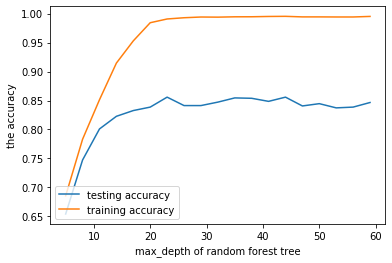

In [17]:
# draw random forest tree result, when we have 10 different tree
import matplotlib.pyplot as plt
plt.plot(range(5, 60, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 60, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("max_depth of random forest tree")
plt.legend(loc='lower left')
plt.show()

In [18]:
# set the number of ramdom forest tree as 30, and re_train the ramdom foreste tree model
test_accuracy = []
train_accuracy = []
RFT_model = None
max_acc = 0
for num in range(5, 60, 3):
    test_acc, train_acc, model = train_inference_random_forest_tree(30, num)
    if RFT_model==None or max_acc < test_acc:
        max_acc = test_acc
        RFT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuray are: ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))

 the number of tree is 30
train the random forest tree model with maxdepth is 5
 the number of tree is 30
train the random forest tree model with maxdepth is 8
 the number of tree is 30
train the random forest tree model with maxdepth is 11
 the number of tree is 30
train the random forest tree model with maxdepth is 14
 the number of tree is 30
train the random forest tree model with maxdepth is 17
 the number of tree is 30
train the random forest tree model with maxdepth is 20
 the number of tree is 30
train the random forest tree model with maxdepth is 23
 the number of tree is 30
train the random forest tree model with maxdepth is 26
 the number of tree is 30
train the random forest tree model with maxdepth is 29
 the number of tree is 30
train the random forest tree model with maxdepth is 32
 the number of tree is 30
train the random forest tree model with maxdepth is 35
 the number of tree is 30
train the random forest tree model with maxdepth is 38
 the number of tree is 30
trai

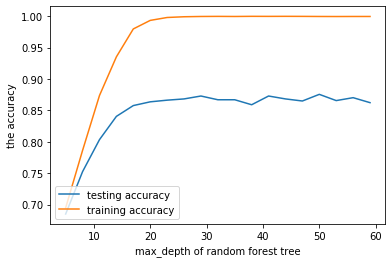

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(5, 60, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 60, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("max_depth of random forest tree")
plt.legend(loc='lower left')
plt.show()

 the number of tree is 100
train the random forest tree model with maxdepth is 5
 the number of tree is 100
train the random forest tree model with maxdepth is 8
 the number of tree is 100
train the random forest tree model with maxdepth is 11
 the number of tree is 100
train the random forest tree model with maxdepth is 14
 the number of tree is 100
train the random forest tree model with maxdepth is 17
 the number of tree is 100
train the random forest tree model with maxdepth is 20
 the number of tree is 100
train the random forest tree model with maxdepth is 23
 the number of tree is 100
train the random forest tree model with maxdepth is 26
 the number of tree is 100
train the random forest tree model with maxdepth is 29
 the number of tree is 100
train the random forest tree model with maxdepth is 32
 the number of tree is 100
train the random forest tree model with maxdepth is 35
 the number of tree is 100
train the random forest tree model with maxdepth is 38
 the number of tre

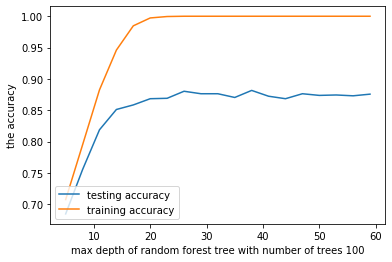

In [20]:
# set the number of ramdom forest tree as 100, and re_train the ramdom foreste tree model
test_accuracy = []
train_accuracy = []
RFT_model = None
max_acc = 0
for num in range(5, 60, 3):
    test_acc, train_acc, model = train_inference_random_forest_tree(100, num)
    if RFT_model==None or max_acc < test_acc:
        max_acc = test_acc
        RFT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuray are: ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))


# draw the training and test result
plt.plot(range(5, 60, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 60, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("max depth of random forest tree with number of trees 100")
plt.legend(loc='lower left')
plt.show()

### now we are going to use gradient boosting tree to improve the result, and hopefully we can get better results!


In [15]:
def train_inference_GDBT(n_estimator_, max_depth_):
    print(" the number of tree is " + str(n_estimator_))
    print("train the GDBT tree model with maxdepth is " +str(max_depth_))
    model = GradientBoostingClassifier(max_depth=max_depth_, n_estimators = n_estimator_)
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
    return np.sum(test_predictions == y_test)/len(y_test), np.sum(train_predictions == y_train)/len(y_train), model

 the number of tree is 30
train the GDBT tree model with maxdepth is 5
 the number of tree is 30
train the GDBT tree model with maxdepth is 8
 the number of tree is 30
train the GDBT tree model with maxdepth is 11
 the number of tree is 30
train the GDBT tree model with maxdepth is 14
 the number of tree is 30
train the GDBT tree model with maxdepth is 17
 the number of tree is 30
train the GDBT tree model with maxdepth is 20
 the number of tree is 30
train the GDBT tree model with maxdepth is 23
 the number of tree is 30
train the GDBT tree model with maxdepth is 26
 the number of tree is 30
train the GDBT tree model with maxdepth is 29
 the number of tree is 30
train the GDBT tree model with maxdepth is 32
 the number of tree is 30
train the GDBT tree model with maxdepth is 35
 the number of tree is 30
train the GDBT tree model with maxdepth is 38
the testing accuray are: 
[0.8101851851851852, 0.8465608465608465, 0.8591269841269841, 0.8571428571428571, 0.8571428571428571, 0.840608465

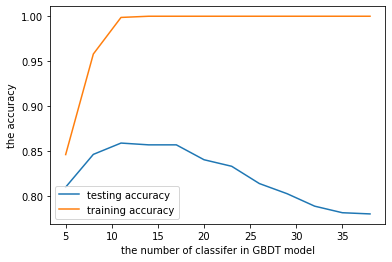

In [28]:
test_accuracy = []
train_accuracy = []
GDBT_model = None
max_acc = 0
for num in range(5, 40, 3):
    test_acc, train_acc, model = train_inference_GDBT(30, num)
    if GDBT_model==None or max_acc < test_acc:
        max_acc = test_acc
        GDBT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuracy are: ")
print(train_accuracy)
print("the best accuracy is : " + str(max_acc))

# draw the training and test result
plt.plot(range(5, 40, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 40, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of classifer in GBDT model")
plt.legend(loc='lower left')
plt.show()

In [16]:
# now let's try adaboosting tree classifier
from sklearn.ensemble import AdaBoostClassifier
def train_inference_AdaBoostingTree(n_estimator_):
    print(" the number of classifer is " + str(n_estimator_))
    #print("train the GDBT tree model with maxdepth is " +str(max_depth_))
    model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5, n_estimators=30),n_estimators = n_estimator_, learning_rate = 0.01, algorithm='SAMME')
    model.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    train_predictions = model.predict(X_train)
    return np.sum(test_predictions == y_test)/len(y_test), np.sum(train_predictions == y_train)/len(y_train), model

 the number of classifer is 30
 the number of classifer is 35
 the number of classifer is 40
 the number of classifer is 45
 the number of classifer is 50
 the number of classifer is 55
 the number of classifer is 60
 the number of classifer is 65
 the number of classifer is 70
 the number of classifer is 75
 the number of classifer is 80
 the number of classifer is 85
 the number of classifer is 90
 the number of classifer is 95
 the number of classifer is 100
 the number of classifer is 105
 the number of classifer is 110
 the number of classifer is 115
 the number of classifer is 120
 the number of classifer is 125
 the number of classifer is 130
 the number of classifer is 135
 the number of classifer is 140
 the number of classifer is 145
 the number of classifer is 150
 the number of classifer is 155
 the number of classifer is 160
 the number of classifer is 165
 the number of classifer is 170
 the number of classifer is 175
 the number of classifer is 180
 the number of classif

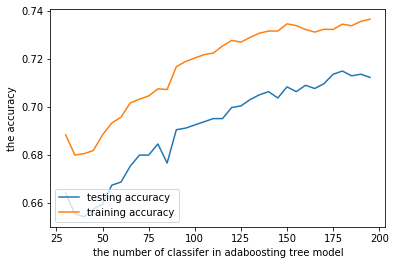

In [43]:
test_accuracy = []
train_accuracy = []
GDBT_model = None
max_acc = 0
for num in range(30, 200, 5):
    test_acc, train_acc, model = train_inference_AdaBoostingTree(num)
    if GDBT_model==None or max_acc < test_acc:
        max_acc = test_acc
        GDBT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuracy are: ")
print(train_accuracy)
print("the best accuracy is : " + str(max_acc))

# draw the training and test result
plt.plot(range(30, 200, 5), test_accuracy, label='testing accuracy')
plt.plot(range(30, 200, 5), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of classifer in adaboosting tree model")
plt.legend(loc='lower left')
plt.show()

### Thus, the best model is gradient booting tree, which can acheive testing accuray as 0.85. However, the testing accuracy is a little low ,and it could be likely that we didn't do data preprecessing, Let's try PCA  method to work on cleaning data, and get the most important features of them.

In [20]:
from sklearn.preprocessing import StandardScaler
columns = []
for name in train.columns:
    columns.append(name)

# use PCA to preprocess data, firtly try 25 components 
from sklearn.decomposition import PCA
X = train.loc[:,columns].values
#X = StandardScaler().fit_transform(X)
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [21]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1645.577232,4624.322593,-337.132612,94.129492,-35.684585,-63.350099,26.646540,-9.863423,-3.533134,1.988644,0.310553,0.455830,0.026057,-0.591768,-0.041422
1,1515.626132,4647.197867,-334.223884,49.276872,-26.064321,-61.265530,30.115836,-12.729642,-3.493966,3.021315,0.307943,0.463888,0.046364,-0.605310,-0.036798
2,3762.972005,2989.225209,-544.331078,114.479093,5.005117,18.278621,-0.939034,-26.006644,0.177698,0.239051,0.088164,0.040310,0.156493,0.309690,-0.025645
3,3735.714904,3114.406093,-561.020519,107.547793,18.533879,77.353082,2.122524,-36.004191,6.924245,-0.555085,0.202173,0.237991,0.245303,0.735144,-0.037439
4,1485.946176,4603.048324,-343.532710,-6.942680,-33.870539,-45.725915,39.111803,-14.461973,-4.022745,3.043386,0.301189,0.461982,0.042285,-0.613637,-0.036428


In [22]:
print(" the number of total pricipalDf is " + str(len(principalDf)))

 the number of total pricipalDf is 15120


In [23]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, train_labels, test_size=0.2, random_state=42, \
                                                    shuffle = True)

In [24]:
test_accuracy = []
train_accuracy = []
max_acc = 0
KNN_model = None
for num in range(3, 19, 2):
    test_acc, train_acc, model = train_inference_KNN(num)
    if KNN_model == None or max_acc < test_acc:
        max_acc = test_acc
        KNN_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the test accuracies are: ")
print(test_accuracy)
print("the training accraucy are : ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))

training KNN model ...
the number of neig is: 3
training KNN model ...
the number of neig is: 5
training KNN model ...
the number of neig is: 7
training KNN model ...
the number of neig is: 9
training KNN model ...
the number of neig is: 11
training KNN model ...
the number of neig is: 13
training KNN model ...
the number of neig is: 15
training KNN model ...
the number of neig is: 17
the test accuracies are: 
[0.8207671957671958, 0.8048941798941799, 0.7876984126984127, 0.7767857142857143, 0.7592592592592593, 0.7585978835978836, 0.7529761904761905, 0.7490079365079365]
the training accraucy are : 
[0.9132771164021164, 0.875165343915344, 0.8516865079365079, 0.8310185185185185, 0.8158068783068783, 0.8043981481481481, 0.7964616402116402, 0.7863756613756614]
the best accuracy is : 0.8207671957671958


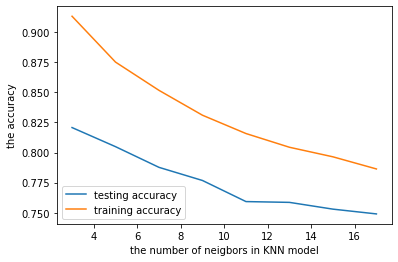

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(3, 19, 2), test_accuracy, label='testing accuracy')
plt.plot(range(3, 19, 2), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of neigbors in KNN model")
plt.legend(loc='lower left')
plt.show()

train the decision tree model with maxdepth is 5
train the decision tree model with maxdepth is 8
train the decision tree model with maxdepth is 11
train the decision tree model with maxdepth is 14
train the decision tree model with maxdepth is 17
train the decision tree model with maxdepth is 20
train the decision tree model with maxdepth is 23
train the decision tree model with maxdepth is 26
train the decision tree model with maxdepth is 29
train the decision tree model with maxdepth is 32
train the decision tree model with maxdepth is 35
train the decision tree model with maxdepth is 38
the testing accuray are: 
[0.6223544973544973, 0.7109788359788359, 0.7622354497354498, 0.7744708994708994, 0.7817460317460317, 0.7761243386243386, 0.7764550264550265, 0.781415343915344, 0.7685185185185185, 0.7728174603174603, 0.7711640211640212, 0.7757936507936508]
the training accuray are: 
[0.6423611111111112, 0.763558201058201, 0.8780588624338624, 0.9522156084656085, 0.9833002645502645, 0.9942129

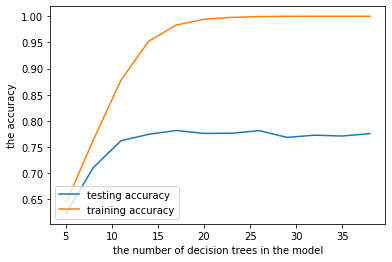

In [26]:
# re-train decision tree on the PCA data
test_accuracy = []
train_accuracy = []
DT_model = None
max_acc = 0
for num in range(5, 40, 3):
    test_acc, train_acc, model = train_inference_DT(num)
    if DT_model==None or max_acc < test_acc:
        max_acc = test_acc
        DT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuray are: ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))

# draw the training and test result
plt.plot(range(5, 40, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 40, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of decision trees in the model")
plt.legend(loc='lower left')
plt.show()

 the number of tree is 100
train the random forest tree model with maxdepth is 5
 the number of tree is 100
train the random forest tree model with maxdepth is 8
 the number of tree is 100
train the random forest tree model with maxdepth is 11
 the number of tree is 100
train the random forest tree model with maxdepth is 14
 the number of tree is 100
train the random forest tree model with maxdepth is 17
 the number of tree is 100
train the random forest tree model with maxdepth is 20
 the number of tree is 100
train the random forest tree model with maxdepth is 23
 the number of tree is 100
train the random forest tree model with maxdepth is 26
 the number of tree is 100
train the random forest tree model with maxdepth is 29
 the number of tree is 100
train the random forest tree model with maxdepth is 32
 the number of tree is 100
train the random forest tree model with maxdepth is 35
 the number of tree is 100
train the random forest tree model with maxdepth is 38
the testing accura

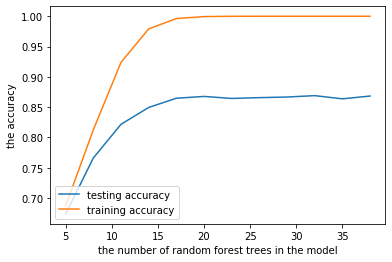

In [27]:
# set the number of ramdom forest tree as 100, and re_train the ramdom foreste tree model
test_accuracy = []
train_accuracy = []
RFT_model = None
max_acc = 0
for num in range(5, 40, 3):
    test_acc, train_acc, model = train_inference_random_forest_tree(100, num)
    if RFT_model==None or max_acc < test_acc:
        max_acc = test_acc
        RFT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuray are: ")
print(train_accuracy)
print("the best accuracy is : " +str(max_acc))


# draw the training and test result
plt.plot(range(5, 40, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 40, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of random forest trees in the model")
plt.legend(loc='lower left')
plt.show()

###  let's retrain graident boosting tree based on preprocessed data and test it!

 the number of tree is 30
train the GDBT tree model with maxdepth is 5
 the number of tree is 30
train the GDBT tree model with maxdepth is 8
 the number of tree is 30
train the GDBT tree model with maxdepth is 11
 the number of tree is 30
train the GDBT tree model with maxdepth is 14
 the number of tree is 30
train the GDBT tree model with maxdepth is 17
 the number of tree is 30
train the GDBT tree model with maxdepth is 20
 the number of tree is 30
train the GDBT tree model with maxdepth is 23
 the number of tree is 30
train the GDBT tree model with maxdepth is 26
 the number of tree is 30
train the GDBT tree model with maxdepth is 29
 the number of tree is 30
train the GDBT tree model with maxdepth is 32
 the number of tree is 30
train the GDBT tree model with maxdepth is 35
 the number of tree is 30
train the GDBT tree model with maxdepth is 38
the testing accuray are: 
[0.8045634920634921, 0.8478835978835979, 0.8541666666666666, 0.8416005291005291, 0.8111772486772487, 0.780092592

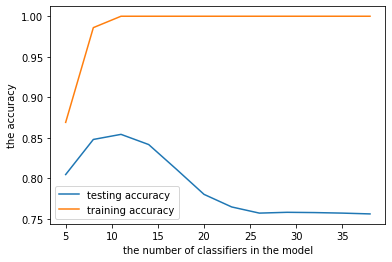

In [28]:
test_accuracy = []
train_accuracy = []
GDBT_model = None
max_acc = 0
for num in range(5, 40, 3):
    test_acc, train_acc, model = train_inference_GDBT(30, num)
    if GDBT_model==None or max_acc < test_acc:
        max_acc = test_acc
        GDBT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuracy are: ")
print(train_accuracy)
print("the best accuracy is : " + str(max_acc))

# draw the training and test result
plt.plot(range(5, 40, 3), test_accuracy, label='testing accuracy')
plt.plot(range(5, 40, 3), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of classifiers in the model")
plt.legend(loc='lower left')
plt.show()

 the number of classifer is 30
 the number of classifer is 35
 the number of classifer is 40
 the number of classifer is 45
 the number of classifer is 50
 the number of classifer is 55
 the number of classifer is 60
 the number of classifer is 65
 the number of classifer is 70
 the number of classifer is 75
 the number of classifer is 80
 the number of classifer is 85
 the number of classifer is 90
 the number of classifer is 95
 the number of classifer is 100
 the number of classifer is 105
 the number of classifer is 110
 the number of classifer is 115
 the number of classifer is 120
 the number of classifer is 125
 the number of classifer is 130
 the number of classifer is 135
 the number of classifer is 140
 the number of classifer is 145
 the number of classifer is 150
 the number of classifer is 155
 the number of classifer is 160
 the number of classifer is 165
 the number of classifer is 170
 the number of classifer is 175
 the number of classifer is 180
 the number of classif

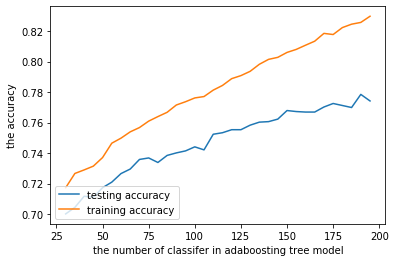

In [29]:
## use adaboosting tree algorithm:
test_accuracy = []
train_accuracy = []
GDBT_model = None
max_acc = 0
for num in range(30, 200, 5):
    test_acc, train_acc, model = train_inference_AdaBoostingTree(num)
    if GDBT_model==None or max_acc < test_acc:
        max_acc = test_acc
        GDBT_model = model
    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)
print("the testing accuray are: ")
print(test_accuracy)
print("the training accuracy are: ")
print(train_accuracy)
print("the best accuracy is : " + str(max_acc))

# draw the training and test result
plt.plot(range(30, 200, 5), test_accuracy, label='testing accuracy')
plt.plot(range(30, 200, 5), train_accuracy, label = 'training accuracy')
plt.ylabel("the accuracy")
plt.xlabel("the number of classifer in adaboosting tree model")
plt.legend(loc='lower left')
plt.show()